<Bh4>Построим имитационную модель, позволяющую рассчитать вероятность блокировки 
линии прямой видимости.

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import math
from numpy.linalg import norm #для нахождения длины
from numpy import arccos, dot, pi, cross #dot вычисляет скалярное произведение двух массивов
                                         #cross работа с векторами

<p style="text-indent: 25px;">В квадратной области, согласно точечному Пуассоновскому
процессу, разместим объекты, которые могут заблокировать линию прямой видимости между двумя
точками.</p>

In [58]:
guard_size = 10
poisson_lam = 0.3
radius = 0.5
distance = 3 #расстояние между абонентами

#круги_блокаторы
def plot_circle (x,y,r):
    angles = np.linspace(0,2*np.pi,50)
    x_cir = x+r*np.cos(angles)
    y_cir = y+r*np.sin(angles)
    plt.plot(x_cir,y_cir,'red')

In [59]:
# Инициализация Пуассоновского точечного процесса
def poisson_point_process(lambda0,area_size):
    PP = np.random.poisson(lambda0*area_size**2) #кол-во случайных точек-блокаторов
    x = np.random.uniform(0,area_size,size=PP) #x координаты по распределению Пуассона
    y = np.random.uniform(0,area_size,size=PP) #y координаты по распределению Пуассона
    return(x,y)

In [60]:
# Определим прямоугольную зону вокруг линии
def paint_rectangle(xp1, yp1, xp2, yp2, angle):
    alpha = 2*np.pi-angle #получение остальных точек из данных
    reverse = np.pi/2-alpha
    opposite = reverse + np.pi
    A_x = xp1 + radius * np.cos(opposite)
    A_y = yp1 + radius * np.sin(opposite)
    B_x = xp1 + radius * np.cos(reverse)
    B_y = yp1 + radius * np.sin(reverse)
    C_x = xp2 + radius * np.cos(reverse)
    C_y = yp2 + radius * np.sin(reverse)
    D_x = xp2 + radius * np.cos(opposite)
    D_y = yp2 + radius * np.sin(opposite)
    return A_x, A_y, B_x, B_y, C_x, C_y, D_x, D_y

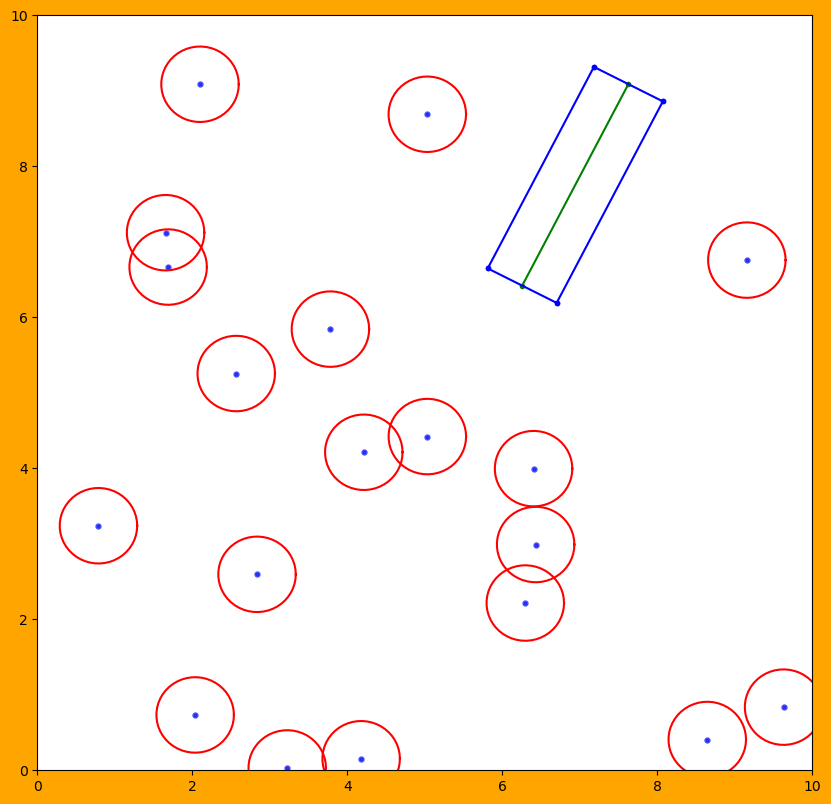

In [68]:
x, y = poisson_point_process(poisson_lam,guard_size) #центры блокаторов
#генерируем точки равномерно распределенные на D
x1=np.random.uniform(0, guard_size)
y1=np.random.uniform(0, guard_size)
angle=np.random.uniform(0, 2*np.pi)
x2=x1+distance*np.cos(angle) # отталкиваясь от x1 строим вторую точку
y2=y1+distance*np.sin(angle)
A_x, A_y, B_x, B_y, C_x, C_y, D_x, D_y=paint_rectangle(x1, y1, x2, y2, angle)


plt.figure(dpi=100, figsize=(10,10), facecolor='orange')
plt.plot(x,y,'.', alpha=0.7, label='first', lw=5, mec='b', mew=2, ms=5)
for i in range(len(x)): #рисуем блокаторы
    plot_circle(x[i], y[i], radius)
plt.plot([x1,x2],[y1,y2],'.-g')

plt.plot([A_x,B_x],[A_y,B_y],'.-b')
plt.plot([A_x,D_x],[A_y,D_y],'.-b')
plt.plot([B_x,C_x],[B_y,C_y],'.-b')
plt.plot([D_x,C_x],[D_y,C_y],'.-b')

plt.xlim(0,guard_size)
plt.ylim(0,guard_size)
plt.show()

<p style="text-indent: 25px;">Количество блокирующих объектов определяется согласно распределению Пуассона, а объекты вбрасываются независимо друг от друга. При этом центры блокирующих объектов распределяются
равномерно внутри рассматриваемой области.</p></Bh4>

In [69]:
# определим точки пересечения блокаторов с прямоугольником, где A,B - концы отрезка прямой видимости, 
# а C - точки, как центры блокаторов
def check_block(A, B, C):
    CA = (C - A) / norm(C - A) # норма _ нахождение расстояния между точками.
    BA = (B - A) / norm(B - A)
    CB = (C - B) / norm(C - B)
    AB = (A - B) / norm(A - B)
    
    if arccos(dot(CA, BA)) > 1: # при помощи данной строки мы находим углы, где BA или AB-вектор прямой видимости
        return norm(C - A) # CA или CB вектор расстояния от центра блокатора до отдной из границ отрезка
    if arccos(dot(CB, AB)) > 1:
        return norm(C - B)
    return norm(cross(A - B, A - C)) / norm(B - A)

In [70]:
def crossing():
    circle_point = []
    point_1 = []
    point_2 = []
    point_1.extend([x1, y1])
    point_2.extend([x2, y2])
    for i in range(len(x)):
        circle_point.append([x[i], y[i]])
    for i in range(len(x)):
        if np.round(check_block(list_point(point_1), list_point(point_2), list_point(circle_point[i])), 1) <= radius:
            return True

In [71]:
if crossing() == True:
    print ('Los is blocked')
else:
    print('Los is not blocked')

Los is not blocked


<p style="text-indent: 25px;">На основе описанного выше алгоритма получим 1000 реализаций факта блокировки линии прямой видимости и рассчитаем вероятность блокировки линии прямой видимости в поле блокирующих объектов.</p></Bh4>

In [72]:
# Имитационное моделирование
summa = 0
for i in range(1000):
    x, y = poisson_point_process(poisson_lam, guard_size)
    x1 = np.random.uniform (0,guard_size)
    y1 = np.random.uniform (0,guard_size)
    x2=x1+distance*np.cos(angle)
    y2=y1+distance*np.sin(angle)
    if crossing() == True:
        summa+= 1

print ('Вероятность блокировки =', summa/1000)

Вероятность блокировки = 0.618


In [73]:
# Вероятность блокировки по аналитической формуле
S = 2*radius*distance
lamb = poisson_lam*S
P_B = 1-np.exp(-lamb)
print('Вероятность блокировки =', P_B)

Вероятность блокировки = 0.5934303402594008
